# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [1]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [2]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Scrapping Movies Data**

In [3]:
def fetch_movie_urls(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the page, status code:", response.status_code
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup


url = 'https://www.justwatch.com/in/movies?release_year_from=2000'
soup=fetch_movie_urls(url)

## **Fetching Movie URL's**

In [4]:
movie_links = soup.find_all('a', href=True)
movie_urls = [link['href'] for link in movie_links if '/movie/' in link['href']]

url_list=[]
for x in movie_urls:
  url_list.append('https://www.justwatch.com'+x)

# url_list

## **Scrapping Movie Title**

In [5]:
movie_titles = []
for movie_page in url_list:
  movie_page = fetch_movie_urls(movie_page)
  title = movie_page.find('h1',class_='title-detail-hero__details__title').get_text(strip=True)
  movie_titles.append(title)

# movie_titles

In [6]:
movie_titles

['Lucky Baskhar(2024)',
 'Bhool Bhulaiyaa 3(2024)',
 'Devara Part 1(2024)',
 'Deadpool & Wolverine(2024)',
 'Stree 2: Sarkate Ka Aatank(2024)',
 'Kishkindha Kaandam(2024)',
 'Pushpa 2 - The Rule(2024)',
 'The Substance(2024)',
 'Amaran(2024)',
 'Vettaiyan(2024)',
 'Venom: The Last Dance(2024)',
 'All We Imagine as Light(2024)',
 'Bagheera(2024)',
 'Pushpa: The Rise(2021)',
 'Gladiator(2000)',
 'Martin(2024)',
 'Kanguva(2024)',
 'Singham Again(2024)',
 'The Wild Robot(2024)',
 'Alien: Romulus(2024)',
 'A.R.M(2024)',
 'Meiyazhagan(2024)',
 'Vicky Vidya Ka Woh Wala Video(2024)',
 'Black(2024)',
 'The Buckingham Murders(2024)',
 'The Sabarmati Report(2024)',
 'Siddharth Roy(2024)',
 'Lubber Pandhu(2024)',
 'Do Patti(2024)',
 'Tumbbad(2018)',
 'A Quiet Place: Day One(2024)',
 'Smile 2(2024)',
 'Sikandar Ka Muqaddar(2024)',
 'Bhool Bhulaiyaa 2(2022)',
 'My Old Ass(2024)',
 'Oldboy(2003)',
 '365 Days(2020)',
 'Red One(2024)',
 'Kill(2024)',
 'Kalki 2898 AD(2024)',
 'Transformers One(2024)',
 

## **Scrapping release Year**

In [7]:
movie_release_year = []
for movie_page in url_list:
  movie_page = fetch_movie_urls(movie_page)
  release_year= movie_page.find('span', class_='release-year').get_text(strip=True)
  release_year = release_year.strip('()')
  movie_release_year.append(release_year)

# movie_release_year

## **Scrapping Genres**

In [8]:
movie_genres = []
for movie_page in url_list:
    movie_page = fetch_movie_urls(movie_page)

    try:
      genre_heading = movie_page.find('h3', string='Genres')
      genre_value = genre_heading.find_next('div', class_='detail-infos__value').find('span').get_text(strip=True)
      movie_genres.append(genre_value)
    except AttributeError:
      movie_genres.append("Not Found")

# movie_genres

## **Scrapping IMBD Rating**

In [9]:
IMDB_Rating = []
for movie_page in url_list:
    movie_page = fetch_movie_urls(movie_page)

    try:
      imdb = movie_page.find('span', class_='imdb-score')
      imdb_value = imdb.get_text(strip=True)[0:3]
      IMDB_Rating.append(imdb_value)
    except AttributeError:
        IMDB_Rating.append("Not Found")

# IMDB_Rating

## **Scrapping Runtime/Duration**

In [10]:
Duration = []
for movie_page in url_list:
    movie_page = fetch_movie_urls(movie_page)

    try:
        runtime = movie_page.find('h3', string='Runtime')
        runtime_value = runtime.find_next('div', class_='detail-infos__value').get_text(strip=True)
        Duration.append(runtime_value)
    except AttributeError:
        Duration.append(0)

# Duration

## **Scrapping Age Rating**

In [11]:
Age_Rating = []
for movie_page in url_list:
    movie_page = fetch_movie_urls(movie_page)

    try:
      age_rt = movie_page.find('h3', string='Age rating')
      age_rt_value = age_rt.find_next('div', class_='detail-infos__value').get_text(strip=True)
      Age_Rating.append(age_rt_value)
    except AttributeError:
        Age_Rating.append("No Rating")

# Age_Rating

## **Fetching Production Countries Details**

In [12]:
Production_Country = []
for movie_page in url_list:
    movie_page = fetch_movie_urls(movie_page)

    try:
      prod_count = movie_page.find('h3', string=' Production country ')
      prod_count_value = prod_count.find_next('div', class_='detail-infos__value').get_text(strip=True)
      Production_Country.append(prod_count_value)
    except AttributeError:
      Production_Country.append("N/A")

# Production_Country

## **Fetching Streaming Service Details**

In [13]:
stream_list = []
for movie_page in url_list:
    movie_page = fetch_movie_urls(movie_page)

    try:
        img_tags = movie_page.find_all('img', class_='offer__icon')
        stream_services = set()
        for img_tag in img_tags:
            stream_services.add(img_tag['alt'])
        if not stream_services:
            stream_list.append(["No streaming service found"])
        else:
            stream_list.append(list(stream_services))
    except AttributeError:
        stream_list.append(["No streaming service found"])


## **Now Creating Movies DataFrame**

In [14]:
movies_data = {"Title":movie_titles,"Release Year":movie_release_year,"Genre":movie_genres,"IMDB Rating":IMDB_Rating,"Duration":Duration,"Age Rating":Age_Rating,"Production Country":Production_Country,"Available on":stream_list,"Just Watch URL":url_list}
movies_data_df=pd.DataFrame(movies_data)
movies_data_df

,Title,Release Year,Genre,IMDB Rating,Duration,Age Rating,Production Country,Available on,Just Watch URL
0,Lucky Baskhar(2024),2024,"Mystery & Thriller, Crime, Drama",8.2,2h 50min,UA,India,"[Netflix, Bookmyshow]",https://www.justwatch.com/in/movie/lucky-baskhar
1,Bhool Bhulaiyaa 3(2024),2024,"Comedy, Horror",5.1,2h 38min,UA,India,[Bookmyshow],https://www.justwatch.com/in/movie/bhool-bhula...
2,Devara Part 1(2024),2024,"Mystery & Thriller, Action & Adventure, Drama",6.1,2h 56min,UA,India,"[Netflix, Bookmyshow]",https://www.justwatch.com/in/movie/ntr-30
3,Deadpool & Wolverine(2024),2024,"Science-Fiction, Comedy, Action & Adventure",7.7,2h 8min,A,United States,"[Hotstar, Apple TV, Amazon Video]",https://www.justwatch.com/in/movie/deadpool-3
4,Stree 2: Sarkate Ka Aatank(2024),2024,"Comedy, Horror",7.0,2h 27min,UA,India,"[Amazon Prime Video, Amazon Video]",https://www.justwatch.com/in/movie/stree-2
...,...,...,...,...,...,...,...,...,...
105,Dancing Village: The Curse Begins(2024),2024,"Mystery & Thriller, Horror",5.7,2h 2min,No Rating,Indonesia,[Amazon Video],https://www.justwatch.com/in/movie/kkn-di-desa...
106,Cottontail(2024),2024,"Romance, Drama",6.4,1h 34min,No Rating,"Japan, United Kingdom",[Amazon Video],https://www.justwatch.com/in/movie/cottontail
107,The Crow(2024),2024,"Horror, Romance, Mystery & Thriller, Action & ...",4.7,1h 51min,No Rating,"United States, United Kingdom, France, Czech R...",[Amazon Video],https://www.justwatch.com/in/movie/the-crow-2024
108,Nature of the Crime(2024),2024,Documentary,Not Found,1h 29min,No Rating,United States,[No streaming service found],https://www.justwatch.com/in/movie/nature-of-t...


## **Scraping TV  Show Data**

In [15]:
def fetch_tvshow_urls(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the page, status code:", response.status_code
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup


url = 'https://www.justwatch.com/in/tv-shows?release_year_from=2000'
soup=fetch_tvshow_urls(url)

## **Fetching Tv shows Url details**

In [16]:
tv_show_links = soup.find_all('a', href=True)
tv_show_urls = [link['href'] for link in tv_show_links if '/tv-show/' in link['href']]

tv_show_url_list=[]
for x in tv_show_urls:
  tv_show_url_list.append('https://www.justwatch.com'+x)

# tv_show_url_list

## **Fetching Tv Show Title details**

In [17]:
tv_show_titles = []
for tv_show in tv_show_url_list:
  tv_show_page = fetch_tvshow_urls(tv_show)
  tv_show_title=tv_show_page.find('h1', class_='title-detail-hero__details__title').get_text(strip=True)
  tv_show_titles.append(tv_show_title)

# tv_show_titles

## **Fetching Release Year**

In [18]:
tv_show_release_years = []
for tv_show in tv_show_url_list:
  tv_show_page = fetch_tvshow_urls(tv_show)
  tv_show_release_year = tv_show_page.find('span',class_='release-year').get_text(strip=True)
  tv_show_release_years.append(tv_show_release_year[1:5])

# tv_show_release_years

## **Fetching TV Show Genre Details**

In [19]:
tv_show_genres = []
for tv_show in tv_show_url_list:
  tv_show_page = fetch_tvshow_urls(tv_show)

  tv_show_genre_heading=tv_show_page.find('h3',string='Genres')

  tv_show_genre = tv_show_genre_heading.find_next('div', class_='detail-infos__value').find('span').get_text(strip=True)
  tv_show_genres.append(tv_show_genre)

# tv_show_genres

## **Fetching IMDB Rating Details**

In [20]:
IMDB_rating_tv_show = []
for tv_show in tv_show_url_list:
  tv_show_page = fetch_tvshow_urls(tv_show)

  try:
    imdb_rating_tv = tv_show_page.find('span', class_='imdb-score')
    imdb_tv_value=imdb_rating_tv.get_text(strip=True)[0:3]
    IMDB_rating_tv_show.append(imdb_tv_value)
  except AttributeError:
    IMDB_rating_tv_show.append("Not Found")

# IMDB_rating_tv_show

## **Fetching Age Rating Details**

In [21]:
Age_Rating_TVS = []
for tv_show in tv_show_url_list:
  tv_show_page = fetch_tvshow_urls(tv_show)

  try:
    age_rating_show = tv_show_page.find('h3',string='Age rating')
    age_rating_show_value= age_rating_show.find_next('div',class_='detail-infos__value').get_text(strip=True)
    Age_Rating_TVS.append(age_rating_show_value)

  except AttributeError:
    Age_Rating_TVS.append("No Rating")


# Age_Rating_TVS

## **Fetching Production Country details**

In [22]:
Production_Country_TVS= []
for tv_show in tv_show_url_list:
  tv_show_page = fetch_tvshow_urls(tv_show)

  try:
    tv_show_country = tv_show_page.find('h3',string=' Production country ')
    tv_show_country_value= tv_show_country.find_next('div',class_= 'detail-infos__value').get_text(strip=True)
    Production_Country_TVS.append(tv_show_country_value)

  except AttributeError:
    Production_Country_TVS.append('N/A')

# Production_Country_TVS

## **Fetching Streaming Service details**

In [23]:
Streaming_Services_TVS = []
for tv_show in tv_show_url_list:
    tv_show_page = fetch_tvshow_urls(tv_show)

    try:
        img_tags = tv_show_page.find_all('img', class_='offer__icon')
        stream_services_tvs = set()
        for img_tag in img_tags:
            stream_services_tvs.add(img_tag['alt'])
        if not stream_services_tvs:
            Streaming_Services_TVS.append(["No streaming service found"])
        else:
            Streaming_Services_TVS.append(list(stream_services_tvs))
    except AttributeError:
        Streaming_Services_TVS.append(["No streaming service found"])

# Streaming_Services_TVS

## **Fetching Duration Details**

In [24]:
Duration_TVS = []
for tv_show in tv_show_url_list:
  tv_show_page = fetch_tvshow_urls(tv_show)

  try:
    runtime_tvs = tv_show_page.find('h3', string='Runtime')
    runtime_value_tvs = runtime_tvs.find_next('div', class_='detail-infos__value').get_text(strip=True)
    Duration_TVS.append(runtime_value_tvs)
  except AttributeError:
    Duration_TVS.append(0)

# Duration_TVS

## **Creating TV Show DataFrame**

In [25]:
tv_show_data = {"Title":tv_show_titles,"Release Year":tv_show_release_years,"Genre":tv_show_genres,"IMDB Rating":IMDB_rating_tv_show,"Duration":Duration_TVS,"Age Rating":Age_Rating_TVS,"Production Country":Production_Country_TVS,"Available on":Streaming_Services_TVS,"Just Watch URL":tv_show_url_list}
tv_show_data_df=pd.DataFrame(tv_show_data)
tv_show_data_df

,Title,Release Year,Genre,IMDB Rating,Duration,Age Rating,Production Country,Available on,Just Watch URL
0,From(2022),2022,"Horror, Science-Fiction, Mystery & Thriller, D...",7.8,51min,No Rating,United States,[Amazon Prime Video],https://www.justwatch.com/in/tv-show/from
1,The Day of the Jackal(2024),2024,"Crime, Drama, Mystery & Thriller, Action & Adv...",8.2,50min,No Rating,United Kingdom,[Jio Cinema],https://www.justwatch.com/in/tv-show/the-day-o...
2,Thukra ke mera pyaar(2024),2024,Romance,7.1,23min,No Rating,India,[Hotstar],https://www.justwatch.com/in/tv-show/thukra-ke...
3,The Penguin(2024),2024,"Crime, Drama, Fantasy",8.7,58min,No Rating,United States,[Jio Cinema],https://www.justwatch.com/in/tv-show/the-penguin
4,Citadel: Honey Bunny(2024),2024,"Action & Adventure, Drama, Science-Fiction, My...",6.2,50min,No Rating,India,[Amazon Prime Video],https://www.justwatch.com/in/tv-show/citadel-h...
...,...,...,...,...,...,...,...,...,...
105,Rugged Rugby: Conquer or Die- Season 1(2024),2024,"Reality TV, Sport",Not Found,0,No Rating,South Korea,[No streaming service found],https://www.justwatch.com/in/tv-show/rugged-ru...
106,Polo- Season 1(2024),2024,"Documentary, Sport",Not Found,0,No Rating,United States,[No streaming service found],https://www.justwatch.com/in/tv-show/polo/seas...
107,Secret Level- Season 1(2024),2024,"Action & Adventure, Fantasy, Science-Fiction, ...",Not Found,16min,No Rating,United States,[No streaming service found],https://www.justwatch.com/in/tv-show/secret-le...
108,The Kings of Tupelo: A Southern Crime Saga- Mi...,2024,"Crime, Documentary",Not Found,0,No Rating,United States,[No streaming service found],https://www.justwatch.com/in/tv-show/the-kings...


## **Task 2 :- Data Filtering & Analysis**

In [26]:
#Concatinating both the dataframes to form 1 for futher analysis

movies_shows = pd.concat([movies_data_df,tv_show_data_df]).reset_index(drop=True)

In [27]:
#adding a new colum to represent if the record belongs to movie or show dataset

movies_shows['Type'] = 'Movie'  # Seting default to 'Movie'
movies_shows.loc[movies_shows.index >= len(movies_data_df), 'Type'] = 'Show'  # Setting 'Show' for rows from tv_show_data_df

In [28]:
                       #Data Cleaning and Filtering

#Converting date string to int for filtering
movies_shows['Release Year'] = movies_shows['Release Year'].astype(int)

# Filtering movies and TV shows released in the last 2 years (from the current date).

movies_shows = movies_shows[(movies_shows['Release Year'] >= pd.Timestamp.today().year-2) & (movies_shows['Release Year'] <= pd.Timestamp.today().year)]

#cleaning and converting IMDB column for futher analysis
movies_shows = movies_shows[movies_shows['IMDB Rating'] != 'Not Found']
movies_shows['IMDB Rating'] = movies_shows['IMDB Rating'].astype(float)

# Movies and TV Shows released in the last 2 years and with an IMDb rating of 7 or higher.

movies_shows = movies_shows[movies_shows['IMDB Rating'] > 7].reset_index(drop=True)

movies_shows

,Title,Release Year,Genre,IMDB Rating,Duration,Age Rating,Production Country,Available on,Just Watch URL,Type
0,Lucky Baskhar(2024),2024,"Mystery & Thriller, Crime, Drama",8.2,2h 50min,UA,India,"[Netflix, Bookmyshow]",https://www.justwatch.com/in/movie/lucky-baskhar,Movie
1,Deadpool & Wolverine(2024),2024,"Science-Fiction, Comedy, Action & Adventure",7.7,2h 8min,A,United States,"[Hotstar, Apple TV, Amazon Video]",https://www.justwatch.com/in/movie/deadpool-3,Movie
2,Kishkindha Kaandam(2024),2024,"Mystery & Thriller, Drama",8.1,2h 13min,UA,India,[Hotstar],https://www.justwatch.com/in/movie/kishkkindha...,Movie
3,The Substance(2024),2024,"Science-Fiction, Drama, Horror",7.4,2h 20min,No Rating,"France, United Kingdom","[MUBI Amazon Channel, Amazon Video, MUBI]",https://www.justwatch.com/in/movie/the-substance,Movie
4,Amaran(2024),2024,"Action & Adventure, Drama, War & Military",8.4,2h 47min,No Rating,India,"[Netflix, Bookmyshow]",https://www.justwatch.com/in/movie/amaran-2024,Movie
...,...,...,...,...,...,...,...,...,...,...
73,Nobody Wants This(2024),2024,"Romance, Comedy, Drama",7.9,26min,No Rating,United States,[Netflix],https://www.justwatch.com/in/tv-show/nobody-wa...,Show
74,From(2022),2022,"Horror, Science-Fiction, Mystery & Thriller, D...",7.8,51min,No Rating,United States,[Amazon Prime Video],https://www.justwatch.com/in/tv-show/from,Show
75,The Day of the Jackal(2024),2024,"Crime, Drama, Mystery & Thriller, Action & Adv...",8.2,50min,No Rating,United Kingdom,[Jio Cinema],https://www.justwatch.com/in/tv-show/the-day-o...,Show
76,Thukra ke mera pyaar(2024),2024,Romance,7.1,23min,No Rating,India,[Hotstar],https://www.justwatch.com/in/tv-show/thukra-ke...,Show


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [29]:
#Mean IMDB rating for both Movies and Tv Shows
Average_IMDB = round(movies_shows['IMDB Rating'].mean(),2)
# Average_IMDB

#Mean IMDB rating Movies and Tv Shows wise
Average_Individual_IMDB = movies_shows.groupby('Type')['IMDB Rating'].mean().round(2)
# Average_Individual_IMDB

## **Analyzing Top Genres**

In [30]:
#Examining Top Genres across movies and tvshows

genre_count = {}

for genre in movies_shows['Genre']:
  genre = genre.split(", ")
  count = 1
  for each_genre in genre:
    if each_genre not in genre_count:
      genre_count[each_genre] = count
    else:
      genre_count[each_genre] += 1

# genre_count

genre_count_df = pd.DataFrame({'Genre':genre_count.keys(),'Count':genre_count.values()})
genre_count_df = genre_count_df.sort_values(by='Count',ascending = False).reset_index(drop=True)

# genre_count_df.head()

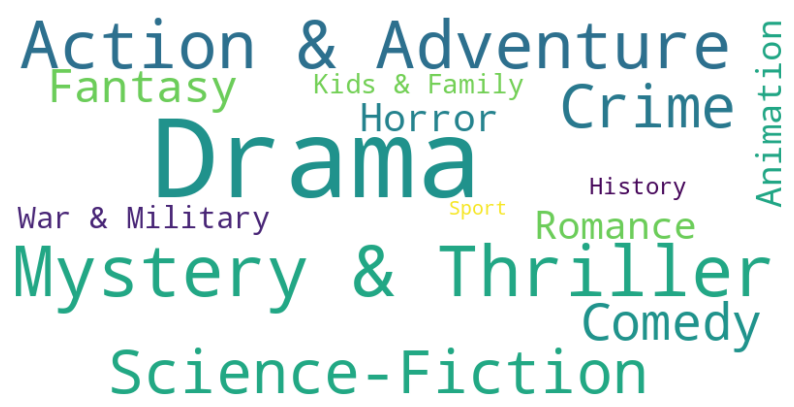

In [31]:
#Let's Visvalize it using word cloud

from wordcloud import WordCloud

word_counts = genre_count_df.set_index('Genre')['Count'].to_dict()

wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Finding Predominant Streaming Service**

In [32]:
# - Determining the streaming service with the most significant number of offerings.

streaming_services = []
for service in movies_shows['Available on']:
    if len(service) > 1:
        for service_count in service:
            service_split = service_count.split(",")
            streaming_services.append(service_split)
    else:
        streaming_services.append(service)

streaming_services_series = pd.Series(streaming_services).value_counts().reset_index()

streaming_service_counts = streaming_services_series.rename(columns={'index': 'Streaming Service', 0: 'Count'})


# Converting the 'Streaming Service' to string type as needed
streaming_service_counts['Streaming Service'] = streaming_service_counts['Streaming Service'].astype(str)

# Removing square brackets and any extra whitespace from 'Streaming Service' column as needed

streaming_service_counts['Streaming Service'] = streaming_service_counts['Streaming Service'].str.replace('[', '').str.replace(']', '').str.strip()
streaming_service_counts['Streaming Service'] = streaming_service_counts['Streaming Service'].str.strip("' ")

streaming_service_counts.head()

,Streaming Service,count
0,Netflix,19
1,Hotstar,17
2,Amazon Prime Video,14
3,Jio Cinema,13
4,Amazon Video,12


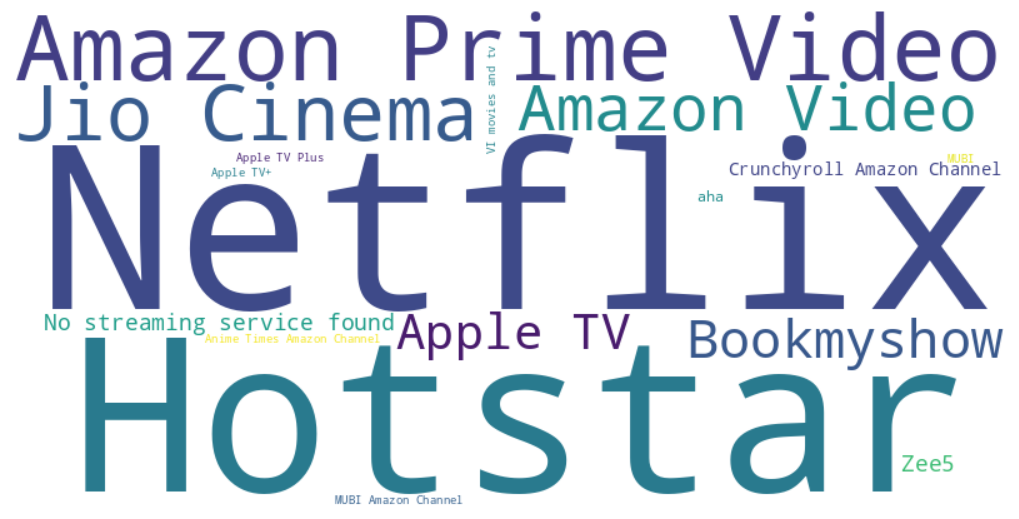

In [33]:
#Generating a Wordcloud from streaming services

text = dict(zip(streaming_service_counts['Streaming Service'], streaming_service_counts['count']))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(text)
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## **Task 3 :- Data Export**

In [34]:
#saving final movies dataframe as Final Movies in csv format
movies_data_df_to_csv = movies_data_df.to_csv('Final_Movies.csv', index=False)

movies_data_df_to_csv

#saving final tvshows dataframe as Final TV Shows in csv format

tv_show_data_df_to_sc = tv_show_data_df.to_csv('Final_TV_Shows.csv', index=False)

tv_show_data_df_to_sc

In [35]:
#saving filter data as Filter Data in csv format
movies_shows_to_csv = movies_shows.to_csv('Final_Filtered_Data.csv', index=False)

movies_shows_to_csv

# **Dataset Drive Link (View Access with Anyone) -**

# ***Congratulations!!! You have completed your Assignment.***